In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense,GlobalAveragePooling2D, Flatten, UpSampling2D
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
#Load dataset
(X_train, Y_train), (X_test, Y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
def preprocess_image_input(input_images):
  input_images = input_images.astype('float32')
  output_ims = tf.keras.applications.resnet50.preprocess_input(input_images)
  return output_ims

In [ ]:
from tensorflow.keras.applications.resnet import ResNet50, preprocess_input
resnet50_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
batch32_model = Sequential([
    Input(shape=(32,32,3)),
    UpSampling2D(size=(7,7)),
    resnet50_model,
    GlobalAveragePooling2D(),
    Flatten(),
    Dense(1024, activation="relu"),
    Dense(512, activation="relu"),
    Dense(10, activation="softmax", name="classification")

])
batch32_model.compile(optimizer='SGD',
                loss='categorical_crossentropy',
                metrics = ['accuracy'])
batch32_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 up_sampling2d_2 (UpSamplin  (None, 224, 224, 3)       0         
 g2D)                                                            
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_1  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_3 (Dense)             (None, 512)              

In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
res_train = preprocess_image_input(X_train)
res_test  = preprocess_image_input(X_test)


res_train_one_hot = to_categorical(Y_train, num_classes=10)
res_test_one_hot = to_categorical(Y_test, num_classes=10)


X, X_CV, Y, Y_CV = train_test_split(res_train, res_train_one_hot,train_size = 0.8, random_state=1)

In [ ]:
print(X.shape)
print(Y.shape)
print(X_CV.shape)
print(Y_CV.shape)

(40000, 32, 32, 3)
(40000, 10)
(10000, 32, 32, 3)
(10000, 10)


In [ ]:
history_32 = batch32_model.fit(X, Y, epochs=10, validation_data = (X_CV, Y_CV), batch_size=32)

Epoch 1/10
1250/1250 [==============================] - 445s 334ms/step - loss: 0.3870 - accuracy: 0.8697 - val_loss: 0.1795 - val_accuracy: 0.9384
Epoch 2/10
1250/1250 [==============================] - 417s 334ms/step - loss: 0.1053 - accuracy: 0.9643 - val_loss: 0.1982 - val_accuracy: 0.9357
Epoch 3/10
1250/1250 [==============================] - 403s 323ms/step - loss: 0.0410 - accuracy: 0.9874 - val_loss: 0.1626 - val_accuracy: 0.9540
Epoch 4/10
1250/1250 [==============================] - 417s 334ms/step - loss: 0.0221 - accuracy: 0.9929 - val_loss: 0.1559 - val_accuracy: 0.9551
Epoch 5/10
1250/1250 [==============================] - 417s 333ms/step - loss: 0.0119 - accuracy: 0.9968 - val_loss: 0.1774 - val_accuracy: 0.9533
Epoch 6/10
1250/1250 [==============================] - 417s 334ms/step - loss: 0.0109 - accuracy: 0.9966 - val_loss: 0.1998 - val_accuracy: 0.9484
Epoch 7/10
1250/1250 [==============================] - 404s 323ms/step - loss: 0.0066 - accuracy: 0.9984 - val_

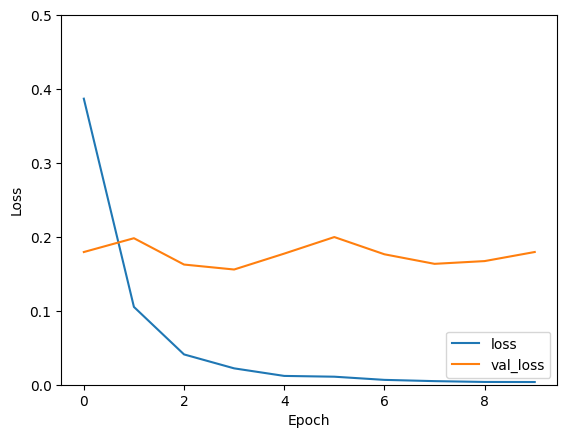

In [ ]:
plt.plot(history_32.history['loss'], label='loss')
plt.plot(history_32.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 0.5])
plt.legend(loc='lower right')

In [ ]:
rest_test_loss, rest_test_acc = batch32_model.evaluate(res_test, res_test_one_hot)
print('\nTest accuracy:', rest_test_acc)

313/313 [==============================] - 28s 90ms/step - loss: 0.1883 - accuracy: 0.9556

Test accuracy: 0.9556000232696533


In [ ]:
batch64_model = Sequential([
    Input(shape=(32,32,3)),
    UpSampling2D(size=(7,7)),
    resnet50_model,
    GlobalAveragePooling2D(),
    Flatten(),
    Dense(1024, activation="relu"),
    Dense(512, activation="relu"),
    Dense(10, activation="softmax", name="classification")

])
batch64_model.compile(optimizer='SGD',
                loss='categorical_crossentropy',
                metrics = ['accuracy'])
batch64_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 up_sampling2d (UpSampling2  (None, 224, 224, 3)       0         
 D)                                                              
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dense_1 (Dense)             (None, 512)               5

In [ ]:
history_64 = batch64_model.fit(X, Y, epochs=10, validation_data = (X_CV, Y_CV), batch_size=64)

Epoch 1/10
625/625 [==============================] - 462s 694ms/step - loss: 0.4514 - accuracy: 0.8526 - val_loss: 0.2281 - val_accuracy: 0.9227
Epoch 2/10
625/625 [==============================] - 446s 714ms/step - loss: 0.1140 - accuracy: 0.9626 - val_loss: 0.2137 - val_accuracy: 0.9256
Epoch 3/10
625/625 [==============================] - 446s 714ms/step - loss: 0.0379 - accuracy: 0.9901 - val_loss: 0.2040 - val_accuracy: 0.9378
Epoch 4/10
625/625 [==============================] - 436s 698ms/step - loss: 0.0168 - accuracy: 0.9961 - val_loss: 0.1677 - val_accuracy: 0.9488
Epoch 5/10
625/625 [==============================] - 446s 714ms/step - loss: 0.0082 - accuracy: 0.9985 - val_loss: 0.1708 - val_accuracy: 0.9503
Epoch 6/10
625/625 [==============================] - 447s 715ms/step - loss: 0.0051 - accuracy: 0.9991 - val_loss: 0.1793 - val_accuracy: 0.9519
Epoch 7/10
625/625 [==============================] - 446s 714ms/step - loss: 0.0040 - accuracy: 0.9994 - val_loss: 0.1753 -

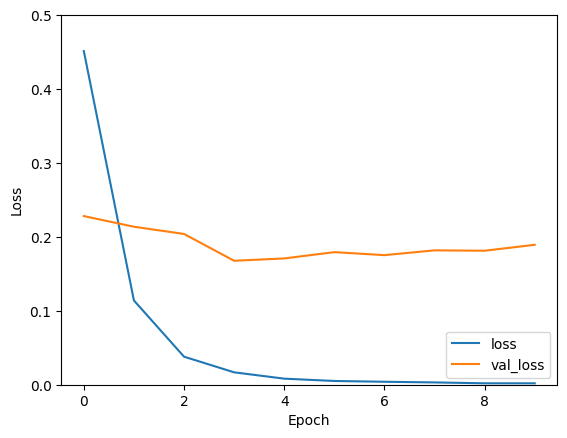

In [ ]:
plt.plot(history_64.history['loss'], label='loss')
plt.plot(history_64.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 0.5])
plt.legend(loc='lower right')

In [ ]:
rest_test_loss, rest_test_acc = batch64_model.evaluate(res_test, res_test_one_hot)
print('\nTest accuracy:', rest_test_acc)

313/313 [==============================] - 35s 103ms/step - loss: 0.1966 - accuracy: 0.9526

Test accuracy: 0.9526000022888184


In [18]:
batch10_model = Sequential([
    Input(shape=(32,32,3)),
    UpSampling2D(size=(7,7)),
    resnet50_model,
    GlobalAveragePooling2D(),
    Flatten(),
    Dense(1024, activation="relu"),
    Dense(512, activation="relu"),
    Dense(10, activation="softmax", name="classification")

])
batch10_model.compile(optimizer='SGD',
                loss='categorical_crossentropy',
                metrics = ['accuracy'])
batch10_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 up_sampling2d_3 (UpSamplin  (None, 224, 224, 3)       0         
 g2D)                                                            
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_3  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dense_6 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_7 (Dense)             (None, 512)              